# Visualization with Pandas (and Matplotlib)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
# read in the drinks data
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent']
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'
drinks = pd.read_csv(url, header=0, names=drink_cols, na_filter=False)

## Histogram: show the distribution of a numerical variable

In [4]:
# sort the beer column and mentally split it into 3 groups
ordered_beer = drinks['beer'].order()

#drinks['beer'] is equivalent to drinks.beer


/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from IPython.kernel.zmq import kernelapp as app


(array([ 72.,  24.,  23.,  15.,  10.,  17.,  15.,   8.,   3.,   6.]),
 array([   0. ,   37.6,   75.2,  112.8,  150.4,  188. ,  225.6,  263.2,
         300.8,  338.4,  376. ]),
 <a list of 10 Patch objects>)

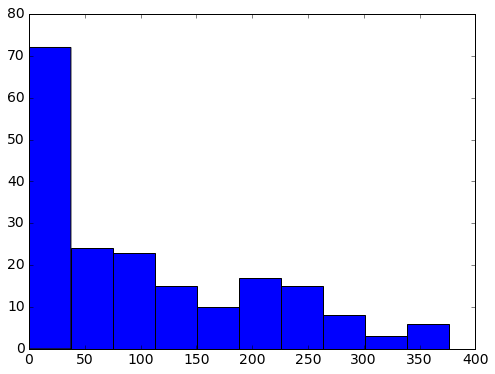

In [5]:
# compare with histogram
plt.hist(ordered_beer) #default bins = 10

(array([ 41.,  20.,  16.,  13.,   6.,  13.,   7.,   5.,   6.,   7.,   5.,
          4.,   7.,   5.,   6.,   7.,   5.,   4.,   5.,   2.,   2.,   0.,
          3.,   2.,   2.]),
 array([   0.  ,   15.04,   30.08,   45.12,   60.16,   75.2 ,   90.24,
         105.28,  120.32,  135.36,  150.4 ,  165.44,  180.48,  195.52,
         210.56,  225.6 ,  240.64,  255.68,  270.72,  285.76,  300.8 ,
         315.84,  330.88,  345.92,  360.96,  376.  ]),
 <a list of 25 Patch objects>)

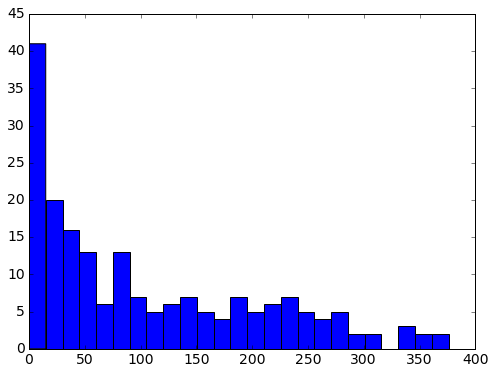

In [6]:
# try more bins
plt.hist(ordered_beer,bins=25)

(array([ 41.,  20.,  16.,  13.,   6.,  13.,   7.,   5.,   6.,   7.,   5.,
          4.,   7.,   5.,   6.,   7.,   5.,   4.,   5.,   2.,   2.,   0.,
          3.,   2.,   2.]),
 array([   0.  ,   15.04,   30.08,   45.12,   60.16,   75.2 ,   90.24,
         105.28,  120.32,  135.36,  150.4 ,  165.44,  180.48,  195.52,
         210.56,  225.6 ,  240.64,  255.68,  270.72,  285.76,  300.8 ,
         315.84,  330.88,  345.92,  360.96,  376.  ]),
 <a list of 25 Patch objects>)

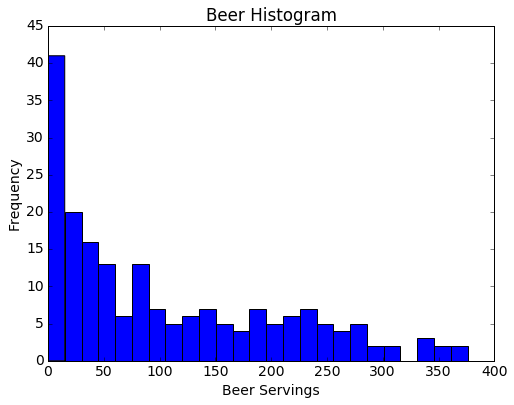

In [7]:
# add title and labels
plt.title('Beer Histogram')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.hist(ordered_beer,bins=25)

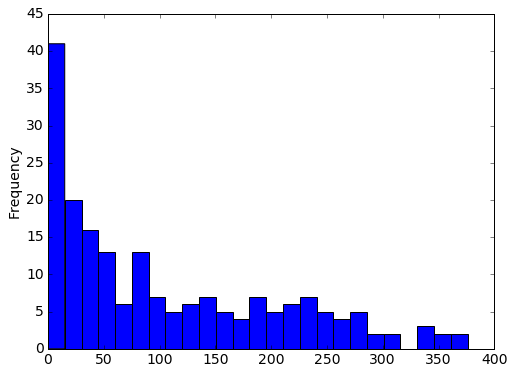

In [8]:
drinks.beer.plot(kind='hist', bins=25) #another syntax

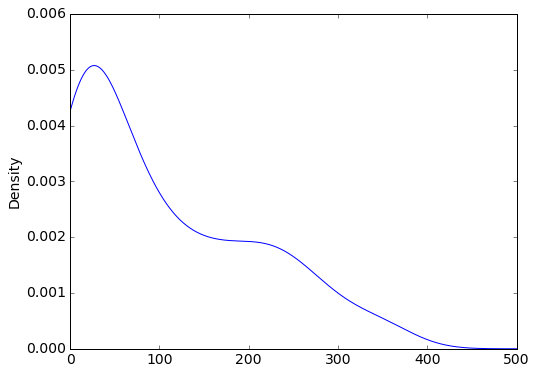

In [9]:
# compare with density plot (smooth version of a histogram)
drinks.beer.plot(kind='density', xlim=(0, 500))

## Scatter Plot: show the relationship between two numerical variables

In [10]:
# select the beer and wine columns and sort by beer
drinks[['beer','wine']].sort('beer')

/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


,beer,wine
0,0,0
40,0,74
79,0,0
90,0,0
97,0,0
103,0,0
106,0,0
111,0,0
128,0,0
147,0,0


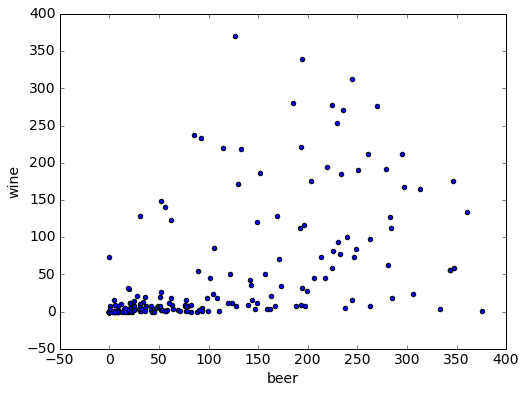

In [11]:
# compare with scatter plot
drinks.plot(kind='scatter', x='beer', y='wine')

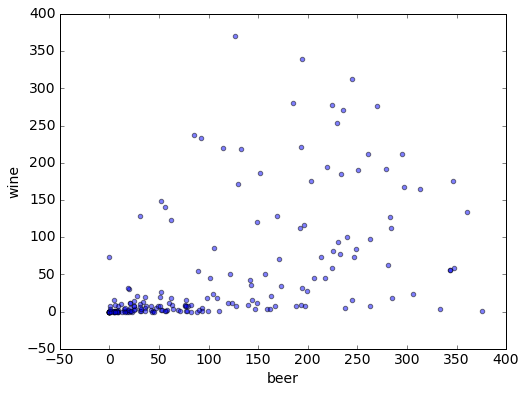

In [12]:
# add transparency
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.5)

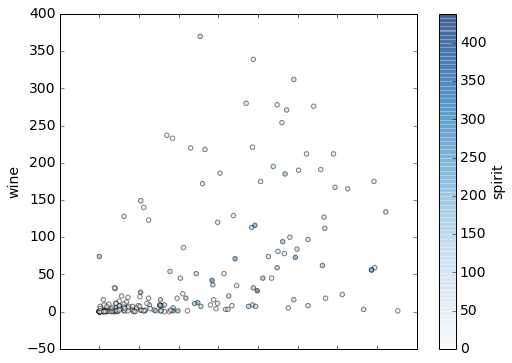

In [13]:
# vary point color by spirit servings
drinks.plot(kind='scatter', x='beer', y='wine', alpha=0.5, c='spirit', colormap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85384fb190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f85380fddd0>]], dtype=object)

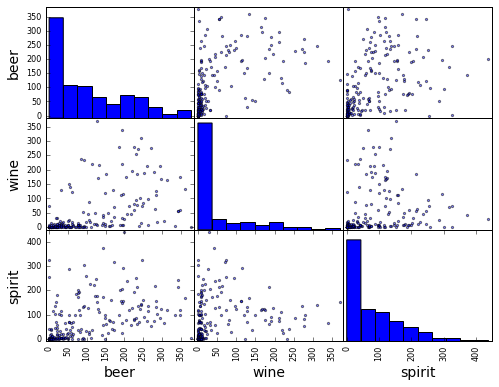

In [14]:
# scatter matrix of three numerical columns

#gotta use pandas

pd.scatter_matrix(drinks[['beer','wine','spirit']])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8537edcd10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8537ad9ad0>]], dtype=object)

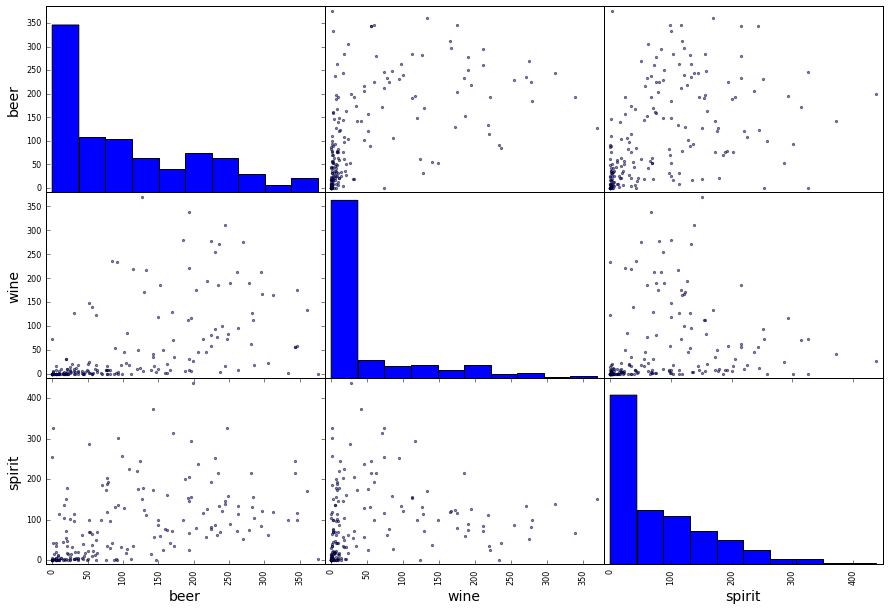

In [15]:
# increase figure size
pd.scatter_matrix(drinks[['beer','wine','spirit']], figsize=(15,10))

## Bar Plot: show a numerical comparison across different categories

In [16]:
# count the number of countries in each continent

#drinks[['continent']].value_counts() 
#I think this doesn't work because the df[[]] syntax returns a df, that does not have value_counts() method
#value_counts() works only for Series type

drinks.continent.value_counts()

AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64

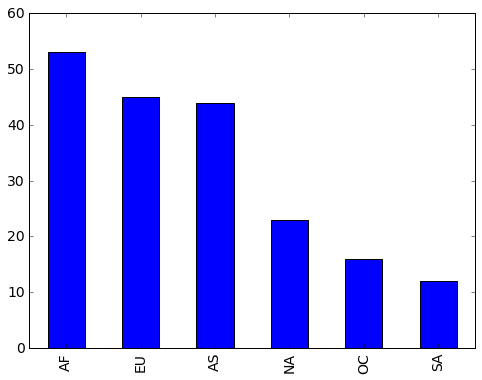

In [17]:
# compare with bar plot
drinks.continent.value_counts().plot(kind='bar')

In [18]:
# calculate the mean alcohol amounts for each continent

#drinks.groupby('continent').count()
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


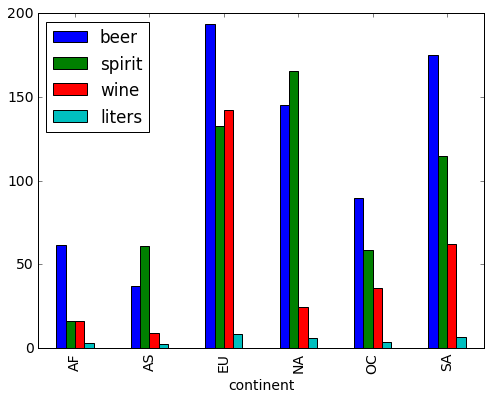

In [19]:
# side-by-side bar plots
drinks.groupby('continent').mean().plot(kind='bar')

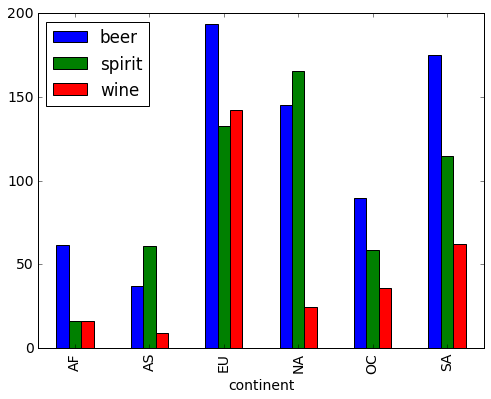

In [20]:
# drop the liters column
drinks.drop('liters', axis=1).groupby('continent').mean().plot(kind='bar')

#can add .drop() after either drinks or mean() because it is a df method
#why axis=1?

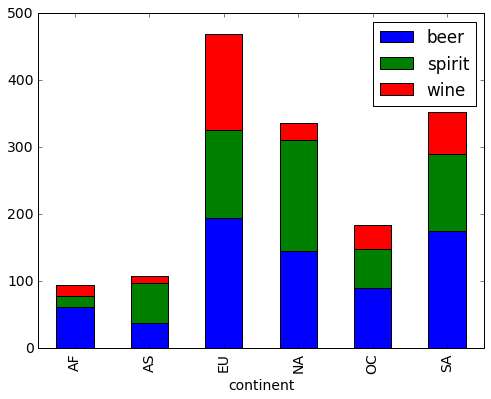

In [21]:
# stacked bar plots

drinks.drop('liters', axis=1).groupby('continent').mean().plot(kind='bar', stacked=True)
#crazy cool

## Box Plot: show quartiles (and outliers) for one or more numerical variables

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

(More useful than mean and standard deviation for describing skewed distributions)

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

** Box Plot **
https://www.google.com.sg/imgres?imgurl=http://www.wellbeingatschool.org.nz/sites/default/files/W%40S_boxplot-labels.png&imgrefurl=http://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots&h=672&w=751&tbnid=Qd1HUdq0L8ny8M:&tbnh=160&tbnw=178&docid=ERnC5S4oRLm4bM&usg=__SvfiSu7gvgzIu6DLMHGhXm7pxzQ=&sa=X&ved=0ahUKEwi_s_GYluPPAhUJqY8KHT3cAywQ9QEIHjAA

In [22]:
# sort the spirit column
drinks.spirit.order()

/home/ddan/anaconda2/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from IPython.kernel.zmq import kernelapp as app


0        0
27       0
128      0
118      0
111      0
46       0
107      0
106      0
103      0
55       0
56       0
97       0
92       0
90       0
63       0
79       0
147      0
19       0
70       0
158      0
13       0
190      0
2        0
39       1
171      1
104      1
34       1
31       1
116      1
78       1
      ... 
21     173
11     176
163    178
7      179
134    186
112    189
36     192
57     194
125    200
85     202
143    205
135    215
75     215
93     216
145    221
139    226
180    237
98     244
87     246
25     252
40     254
169    258
50     286
155    293
72     302
144    315
73     326
141    326
15     373
68     438
Name: spirit, dtype: int64

In [23]:
# show "five-number summary" for spirit
drinks.spirit.describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

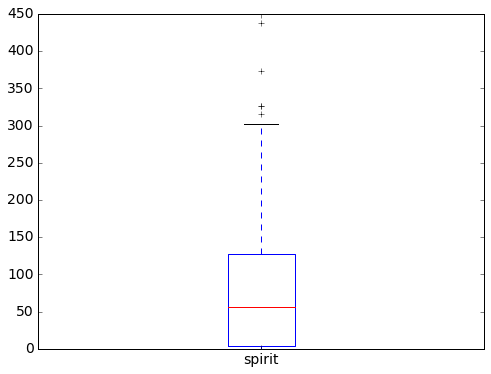

In [24]:
# compare with box plot
drinks.spirit.plot(kind='box')

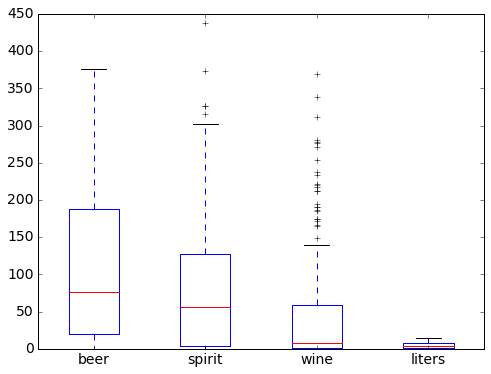

In [25]:
# include multiple variables
drinks.plot(kind='box')
#drinks.drop('liters', axis=1).plot(kind='box') if you want to drop liters, i don't

## Line Plot: show the trend of a numerical variable over time

In [26]:
# read in the ufo data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/ufo.csv'
ufo = pd.read_csv(url)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo['Year'] = ufo.Time.dt.year

In [27]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,1933


In [28]:
# count the number of ufo reports each year (and sort by year)
ufo.Year.value_counts().sort_index()

1930       2
1931       2
1933       1
1934       1
1935       1
1936       2
1937       2
1939       3
1941       2
1942       3
1943       5
1944       8
1945       9
1946       8
1947      41
1948       9
1949      19
1950      31
1951      21
1952      52
1953      36
1954      55
1955      33
1956      46
1957      78
1958      53
1959      57
1960      67
1961      50
1962      72
        ... 
1985     211
1986     186
1987     210
1988     232
1989     247
1990     237
1991     220
1992     245
1993     292
1994     406
1995    1344
1996     851
1997    1237
1998    1743
1999    2774
2000    2635
2001    2925
2002    2933
2003    3507
2004    3850
2005    3787
2006    3445
2007    4058
2008    4655
2009    4251
2010    4154
2011    5089
2012    7263
2013    7003
2014    5382
Name: Year, dtype: int64

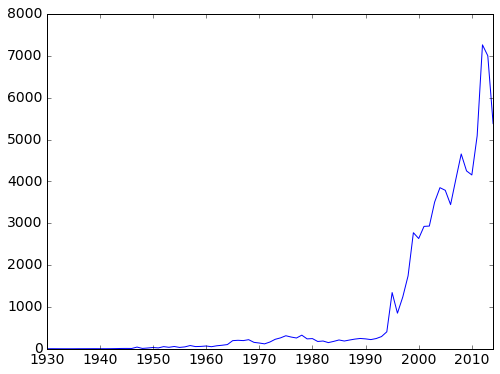

In [29]:
# compare with line plot
ufo.Year.value_counts().sort_index().plot(kind='line')

In [30]:
# don't use a line plot when there is no logical ordering


## Grouped Box Plots: show one box plot for each group

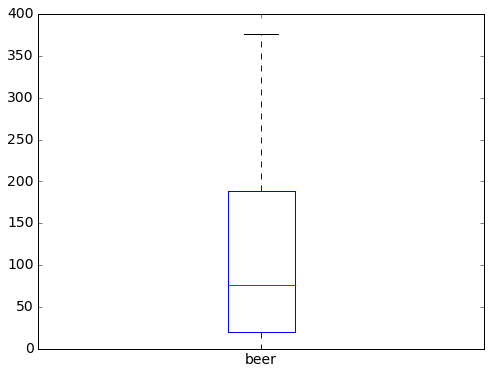

In [31]:
# reminder: box plot of beer servings
drinks.beer.plot(kind='box')

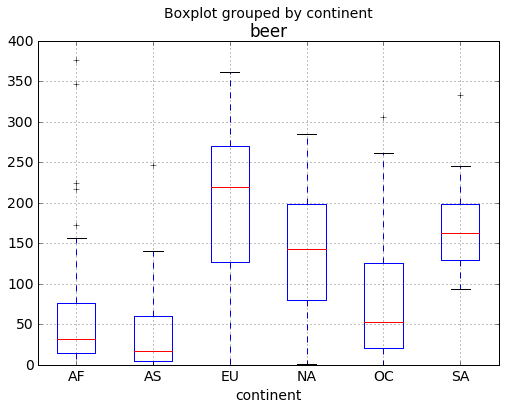

In [32]:
# box plot of beer servings grouped by continent
#drinks.beer.plot(kind='box', by='continent')
drinks.boxplot(column='beer', by='continent')

#why do i suddenly need to use .boxplot()??

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8536e4a790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8536c8bf50>]], dtype=object)

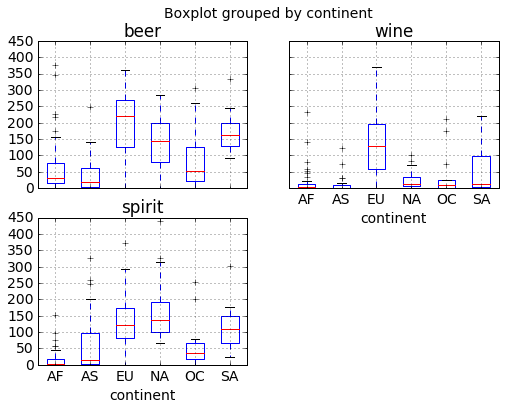

In [33]:
# box plot of all numeric columns grouped by continent
drinks.boxplot(column=['beer','wine','spirit'], by='continent')

## Grouped Histograms: show one histogram for each group

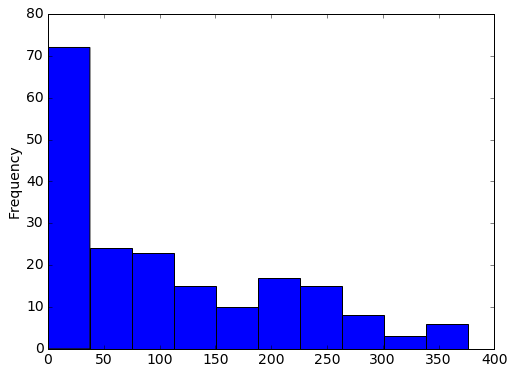

In [34]:
# reminder: histogram of beer servings
drinks.beer.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85367d44d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8536470b90>]], dtype=object)

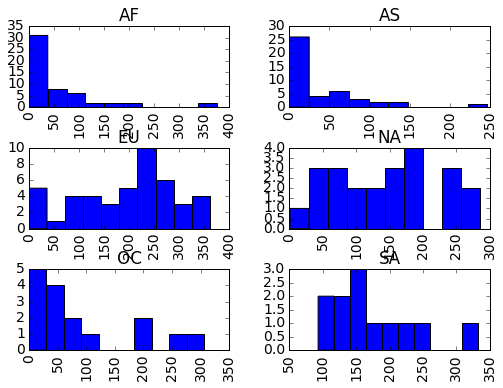

In [35]:
# histogram of beer servings grouped by continent
drinks.hist(column='beer', by='continent')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f853615d210>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8535f5c5d0>]], dtype=object)

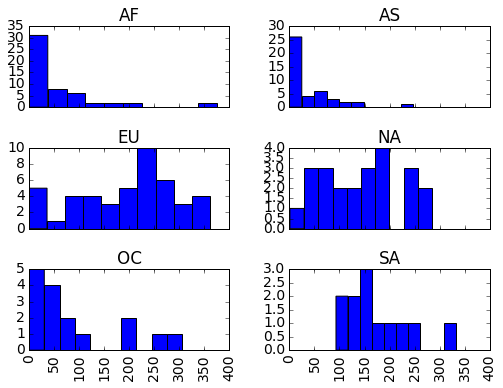

In [36]:
# share the x axes
drinks.hist(column='beer', by='continent', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8535bcf190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f85359676d0>]], dtype=object)

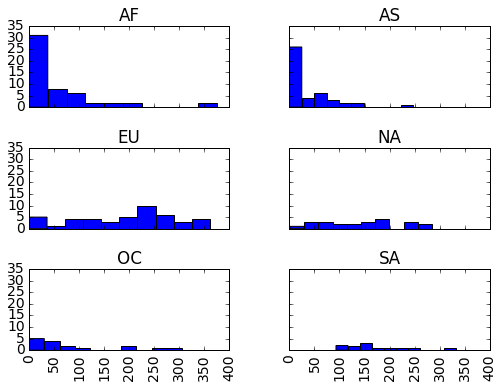

In [37]:
# share the x and y axes
drinks.hist(column='beer', by='continent', sharex=True, sharey=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85356fb0d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f8535268610>]], dtype=object)

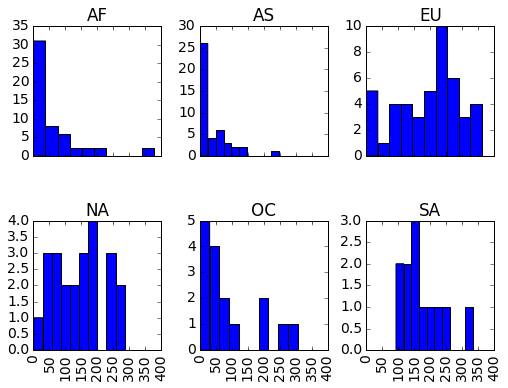

In [38]:
# change the layout
drinks.hist(column='beer', by='continent', sharex=True, layout=(2,3))

## Assorted Functionality

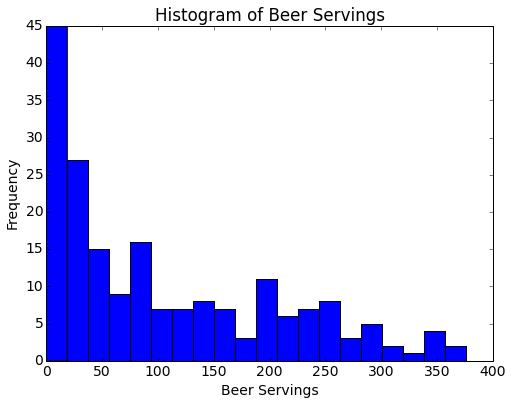

In [36]:
# saving a plot to a file
drinks.beer.plot(kind='hist', bins=20, title='Histogram of Beer Servings')
plt.xlabel('Beer Servings')
plt.ylabel('Frequency')
plt.savefig('beer_histogram.png')

In [37]:
# list available plot styles
plt.style.available

[u'dark_background', u'bmh', u'grayscale', u'ggplot', u'fivethirtyeight']

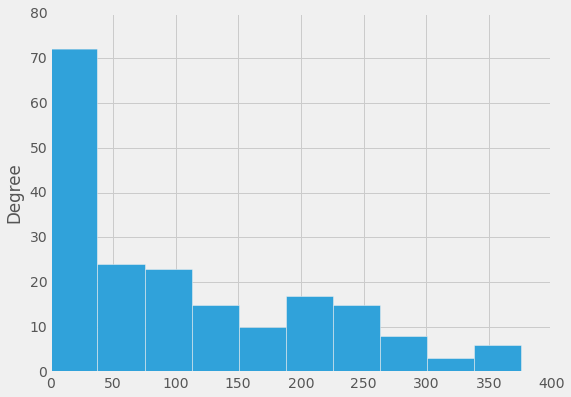

In [137]:
# change to a different style
plt.style.use('fivethirtyeight')
drinks.beer.plot(kind='hist')

In [ ]:
# TODO

# - find csv data of interest to your project
# - explore it using pandas with some visualisation